In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import model_selection, metrics
import tensorflow as tf

In [4]:
path = "./Water_Bodies_Datasets"

data = tf.keras.utils.image_dataset_from_directory(directory = path, image_size = (256, 256), batch_size = 6000, shuffle = False)

Found 408 files belonging to 2 classes.


In [5]:
tf.config.experimental.list_physical_devices('TPU')

[]

In [6]:
for images, masks in data:
    X = images.numpy().astype("uint8")
    y = masks.numpy().astype("uint8")

print(X.shape, y.shape)

(408, 256, 256, 3) (408,)


In [7]:
images = X[y == 0]
masks = X[y == 1]

print(images.shape, masks.shape)

(204, 256, 256, 3) (204, 256, 256, 3)


In [8]:
# num_samples = len(images)
# indices = np.random.choice(num_samples, size=int(num_samples * 0.2), replace=False)

# # Select 50% of the rows from images and masks arrays
# images = images[indices]
# masks = masks[indices]

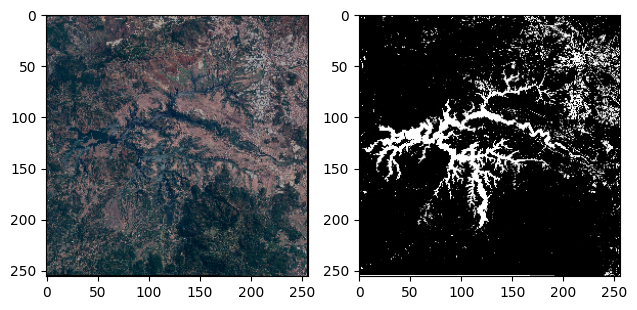

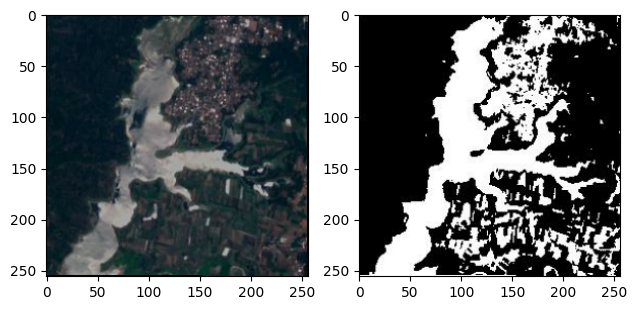

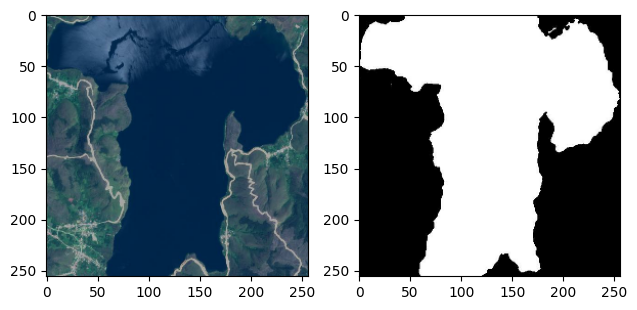

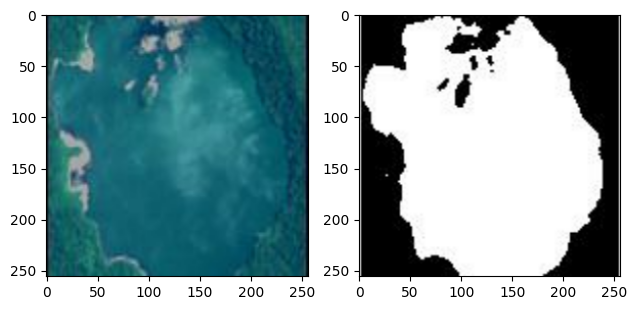

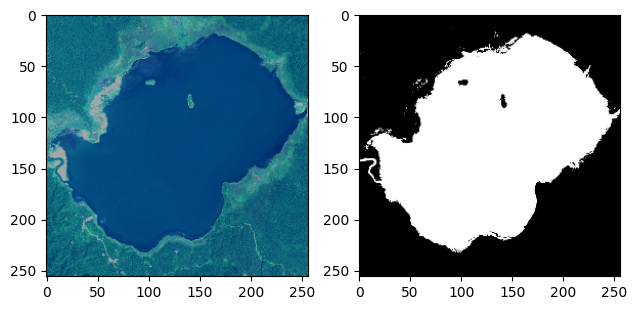

In [9]:
for i in range(5):
    plt.subplot(1, 2, 1)
    plt.imshow(images[i])
    
    plt.subplot(1, 2, 2)
    plt.imshow(masks[i])
    
    plt.tight_layout()
    plt.show()

In [10]:
X = np.zeros(shape = images.shape[:-1] + (1, ))
y = np.zeros(shape = masks.shape[:-1] + (1, ))

for i in range(X.shape[0]):
    X[i] = tf.image.rgb_to_grayscale(images[i])
    y[i] = tf.image.rgb_to_grayscale(masks[i])
    
print(X.shape, y.shape)

(204, 256, 256, 1) (204, 256, 256, 1)


In [11]:
X = X / 255.0
y = y / 255.0

In [12]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size = 0.2, random_state = 42)

print(X_train.shape, X_test.shape)

(163, 256, 256, 1) (41, 256, 256, 1)


In [13]:
# Defining the Convolutional Block
def conv_block(inputs, num_filters):
    x = tf.keras.Sequential([
        tf.keras.layers.Conv2D(num_filters, 3, padding='same'),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Activation('relu'),
        tf.keras.layers.Conv2D(num_filters, 3, padding='same'),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Activation('relu')
    ])(inputs)
    return x

In [14]:
# class SkipWrapper(tf.keras.layers.Layer):
#     def __init__(self, **kwargs):
#         super(SkipWrapper, self).__init__(**kwargs)

#     def call(self, inputs):
#         return inputs

In [15]:
# def encoder_block(inputs, num_filters, name="encoder_block"): 
#     x = tf.keras.layers.Conv2D(num_filters, 3, padding='same', kernel_initializer="he_uniform")(inputs) 
#     x = tf.keras.layers.Activation('elu')(x)  
#     x = tf.keras.layers.Conv2D(num_filters, 3, padding='same', kernel_initializer="he_uniform")(x) 
#     x = tf.keras.layers.Activation('elu')(x) 
#     skip = SkipWrapper()(x)  # Wrap skip connection as a Keras layer
#     x = tf.keras.layers.MaxPool2D(pool_size=(2, 2), strides=2)(x)
#     return x, skip  # Return output and skip connection as Keras layers


# def decoder_block(inputs, skip_features, num_filters, name="decoder_block"): 
#     x = tf.keras.layers.Conv2DTranspose(num_filters, (2, 2), strides=2, padding='same')(inputs) 
#     skip_features = tf.keras.layers.Conv2D(num_filters, 1, padding='same')(skip_features)  # Adjust channels
#     skip_features = tf.keras.layers.Activation('elu')(skip_features)  # Activation
#     skip_features = tf.keras.layers.UpSampling2D(size=(2, 2))(skip_features)  # Upsample to match size
#     print("x shape:", x.shape)
#     print("skip_features shape:", skip_features.shape)
#     if skip_features.shape[-1] != num_filters:  # Check channel dimension
#          skip_features = tf.keras.layers.Conv2D(num_filters, 1, padding='same')(skip_features)
# #     x = tf.keras.layers.Concatenate()([x, skip_features]) 
#     x = tf.keras.layers.Conv2D(num_filters, 3, padding='same', kernel_initializer="he_uniform")(x) 
#     x = tf.keras.layers.Activation('elu')(x) 
#     x = tf.keras.layers.Conv2D(num_filters, 3, padding='same', kernel_initializer="he_uniform")(x)
#     x = tf.keras.layers.Activation('elu')(x) 
#     return x





In [16]:
# def unet_model(input_shape=(256, 256, 1), num_classes=1): 
#     inputs = tf.keras.layers.Input(shape=input_shape) 

#     s1, skip1 = encoder_block(inputs, 64) 
#     s2, skip2 = encoder_block(s1, 128) 
#     s3, skip3 = encoder_block(s2, 256) 
#     s4, skip4 = encoder_block(s3, 512) 

#     b1 = tf.keras.layers.Conv2D(filters=100, kernel_size=(3, 3), padding="same", kernel_initializer="he_uniform")(s4) 
#     b1 = tf.keras.layers.Activation('elu')(b1) 
#     b1 = tf.keras.layers.Conv2D(filters=100, kernel_size=(3, 3), padding="same", kernel_initializer="he_uniform")(b1) 
#     b1 = tf.keras.layers.Activation('elu')(b1) 

#     s5 = decoder_block(b1, skip4, 512) 
#     s6 = decoder_block(s5, skip3, 256) 
#     s7 = decoder_block(s6, skip2, 128) 
#     s8 = decoder_block(s7, skip1, 64) 

#     outputs = tf.keras.layers.Conv2D(filters=num_classes, kernel_size=(1, 1), padding="same", activation="sigmoid")(s8) 

#     model = tf.keras.models.Model(inputs=[inputs], outputs=[outputs], name='U_Net') 
#     return model

In [17]:
# model = unet_model(input_shape = (256, 256, 1), num_classes = 1) 
# model.name = "U_Net"  # Assign a name to the model
# model.summary()

In [18]:


class SkipWrapper(tf.keras.layers.Layer):
    def __init__(self, **kwargs):
        super(SkipWrapper, self).__init__(**kwargs)

    def call(self, inputs):
        return inputs

def encoder_block(inputs, num_filters, name="encoder_block"): 
    x = tf.keras.layers.Conv2D(num_filters, 3, padding='same', kernel_initializer="he_uniform")(inputs) 
    x = tf.keras.layers.Activation('relu')(x)  
    x = tf.keras.layers.Conv2D(num_filters, 3, padding='same', kernel_initializer="he_uniform")(x) 
    x = tf.keras.layers.Activation('relu')(x) 
    skip = SkipWrapper()(x)  # Wrap skip connection as a Keras layer
    x = tf.keras.layers.MaxPool2D(pool_size=(2, 2), strides=2)(x)
    return x, skip  # Return output and skip connection as Keras layers

def decoder_block(inputs, skip_features, num_filters, name="decoder_block"): 
    x = tf.keras.layers.Conv2DTranspose(num_filters, (2, 2), strides=2, padding='same')(inputs) 
    skip_features = tf.keras.layers.Conv2D(num_filters, 1, padding='same')(skip_features)  # Adjust channels
    skip_features = tf.keras.layers.Activation('relu')(skip_features)  # Activation
    skip_features = tf.keras.layers.UpSampling2D(size=(2, 2))(skip_features)  # Upsample to match size
    if skip_features.shape[-1] != num_filters:  # Check channel dimension
         skip_features = tf.keras.layers.Conv2D(num_filters, 1, padding='same')(skip_features)
    x = tf.keras.layers.Conv2D(num_filters, 3, padding='same', kernel_initializer="he_uniform")(x) 
    x = tf.keras.layers.Activation('relu')(x) 
    x = tf.keras.layers.Conv2D(num_filters, 3, padding='same', kernel_initializer="he_uniform")(x)
    x = tf.keras.layers.Activation('relu')(x) 
    return x

def unet_model(input_shape=(256, 256, 1), num_classes=1): 
    inputs = tf.keras.layers.Input(shape=input_shape) 

    s1, skip1 = encoder_block(inputs, 64) 
    s2, skip2 = encoder_block(s1, 128) 
    s3, skip3 = encoder_block(s2, 256) 
    s4, skip4 = encoder_block(s3, 512) 

    b1 = tf.keras.layers.Conv2D(filters=100, kernel_size=(3, 3), padding="same", kernel_initializer="he_uniform")(s4) 
    b1 = tf.keras.layers.Activation('relu')(b1) 
    b1 = tf.keras.layers.Conv2D(filters=100, kernel_size=(3, 3), padding="same", kernel_initializer="he_uniform")(b1) 
    b1 = tf.keras.layers.Activation('relu')(b1) 

    s5 = decoder_block(b1, skip4, 512) 
    s6 = decoder_block(s5, skip3, 256) 
    s7 = decoder_block(s6, skip2, 128) 
    s8 = decoder_block(s7, skip1, 64) 

    outputs = tf.keras.layers.Conv2D(filters=num_classes, kernel_size=(1, 1), padding="same", activation="sigmoid")(s8) 

    model = tf.keras.models.Model(inputs=[inputs], outputs=[outputs], name='U_Net') 
    return model

# Create the model with a valid name
model = unet_model(input_shape=(256, 256, 1), num_classes=1) 

# Print model summary
model.summary()


Model: "U_Net"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 256, 256, 1)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 256, 256, 64)   │           640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation (Activation)         │ (None, 256, 256, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 256, 256, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_1 (Activation)       │ (None, 256, 256, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 128, 128, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 128, 128, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_2 (Activation)       │ (None, 128, 128, 128)  │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 128, 128, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_3 (Activation)       │ (None, 128, 128, 128)  │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 64, 64, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 64, 64, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_4 (Activation)       │ (None, 64, 64, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 64, 64, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_5 (Activation)       │ (None, 64, 64, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 32, 32, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 32, 32, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_6 (Activation)       │ (None, 32, 32, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 32, 32, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_7 (Activation)       │ (None, 32, 32, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 16, 16, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 16, 16, 100)    │       460,900 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_8 (Activation)       │ (None, 16, 16, 100)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 16, 16, 100)    │        90,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_9 (Activation)       │ (None, 16, 16, 100)    │             

 Total params: 12,397,977 (47.29 MB)

 Trainable params: 12,397,977 (47.29 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)  # You can adjust the learning rate

# Compile the model with the chosen optimizer
model.compile(optimizer=optimizer,
              loss=tf.keras.losses.BinaryCrossentropy(),
              metrics=['accuracy'])

# model.compile(optimizer = "adam",  loss=tf.keras.losses.BinaryCrossentropy(), metrics = ["accuracy"])

c1 = tf.keras.callbacks.EarlyStopping(patience = 5, restore_best_weights = True)

history = model.fit(X_train, y_train, epochs = 15, validation_split = 0.2, callbacks = [c1])

Epoch 1/5


c:\Users\Nice\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\models\functional.py:238: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor']
Received: inputs=Tensor(shape=(None, 256, 256, 1))
  warnings.warn(msg)


5/5 ━━━━━━━━━━━━━━━━━━━━ 143s 26s/step - accuracy: 0.4464 - loss: 0.7799 - val_accuracy: 0.4040 - val_loss: 0.6939
Epoch 2/5
1/5 ━━━━━━━━━━━━━━━━━━━━ 2:06 32s/step - accuracy: 0.4069 - loss: 0.6938

KeyboardInterrupt: 

In [ ]:
model.evaluate(X_test, y_test)

2/2 ━━━━━━━━━━━━━━━━━━━━ 10s 2s/step - accuracy: 0.4573 - loss: 0.6924


[0.692499577999115, 0.45542311668395996]